<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [620]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [646]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [647]:
ds = pd.read_csv("/content/drive/MyDrive/Python File/Neural Network/bank.csv")    # load the dataset

## Data Overview

###View the first five rows of the data

In [473]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### View the last five rows of the data

In [474]:
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Shape of the Dataset

In [475]:
ds.shape

(10000, 14)

There are 10000 rows and 14 columns in the dataset.

### Datatypes of columns

In [476]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* Surname, Geography, and Gender are non-numerical columns
* All other variables are numerical

### Statistical Summary of the Data

In [477]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48




*  HasCrCard, IsActiveMember and Exited are boolean variables with values of either 0 or 1.
*  The target variable "Exited" shows a class imbalance, meaning that only about 20.37% of consumers have exited the bank.
*   The average consumer credit score is roughly 650, indicating custumers have good credit scores.



### Check for Missing Values

In [478]:
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


There are no missing values in the dataset

### Unique values for each column

In [479]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


### Duplicate Values in the Dataset

In [480]:
ds.duplicated().sum()

0

There are no duplicate values in the dataset

## Exploratory Data Analysis

### Univariate Analysis

In [481]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [482]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


# function to create distribution plot wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


#### Observations on CreditScore

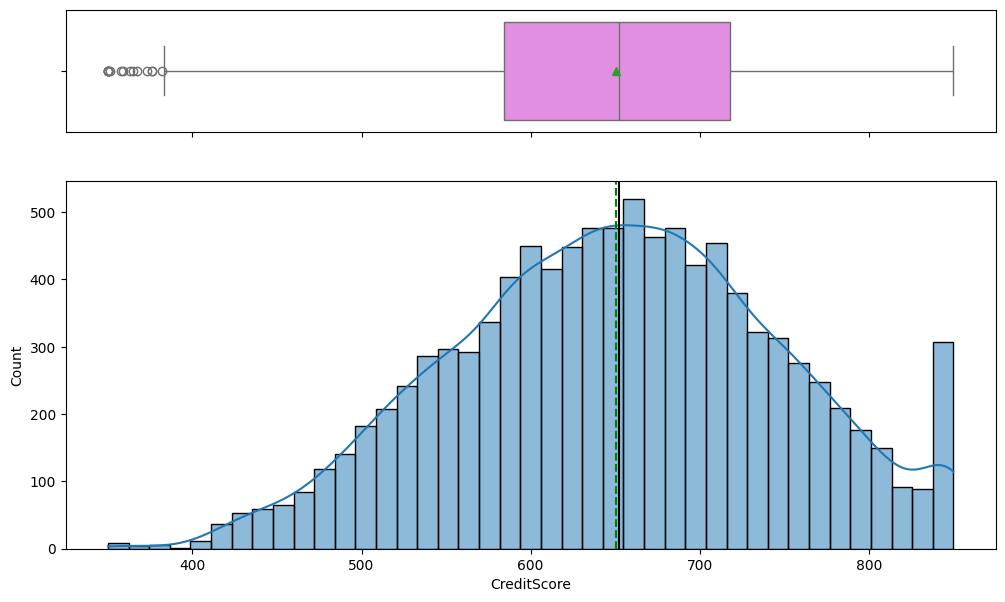

In [483]:
histogram_boxplot(ds,'CreditScore')

* The distribution of credit score is approximately normal.
* It has a few outliers on the left

#### Observations on Age

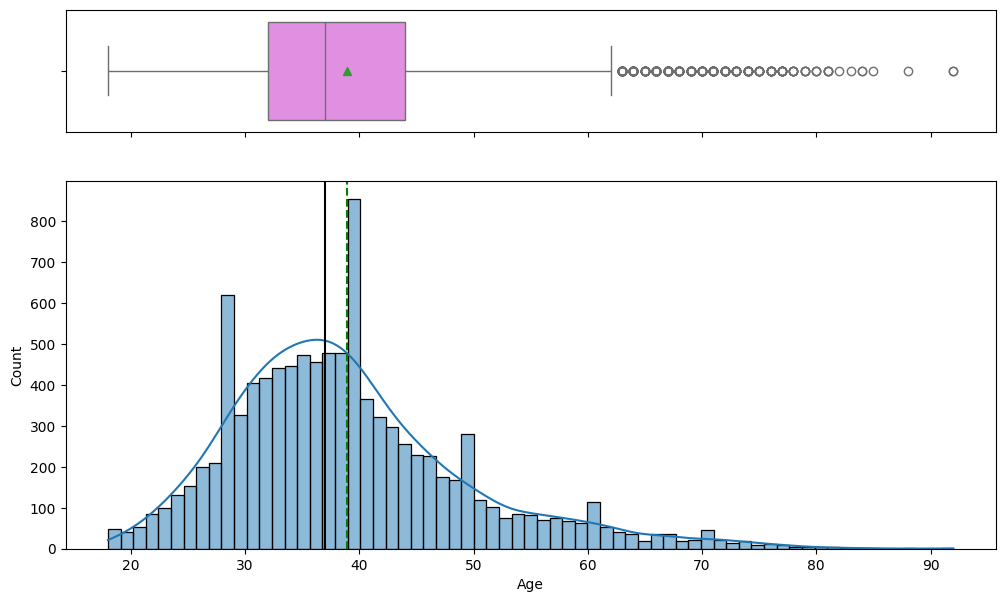

In [484]:
histogram_boxplot(ds, 'Age')          ## create histogram_boxplot for Age

* The distribution of age shows a right skew with the mean greater than the median.
* There are outliers on the right.

#### Observations on Balance

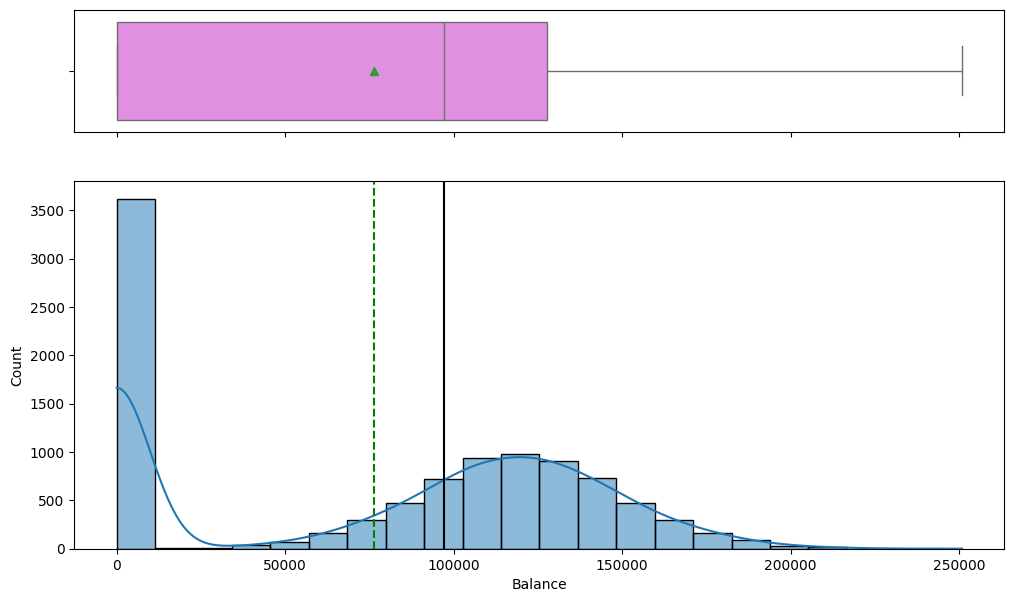

In [485]:
histogram_boxplot(ds, 'Balance')          # create histogram_boxplot for Balance



*   The distribution of age shows a right skew, mean is greater than the median
*   A large number of accounts show zero balance



#### Observations on Estimated Salary

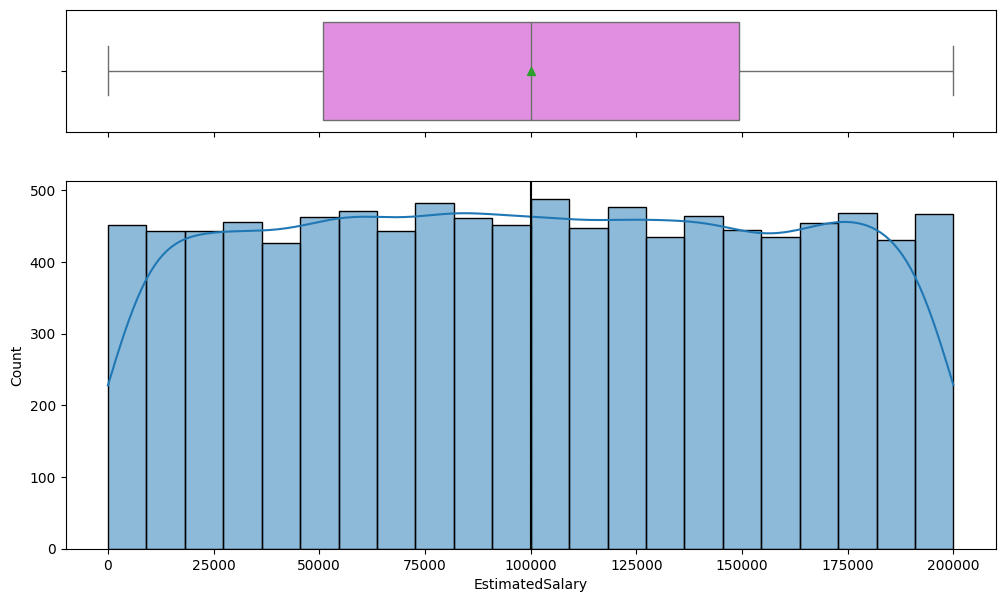

In [486]:
histogram_boxplot(ds, "EstimatedSalary")          # create histogram_boxplot for Estimated Salary

* The distribution of salary is uniform ranging from 0 to 200000.
* The mean and median are equal at 10,000

#### Observations on Exited

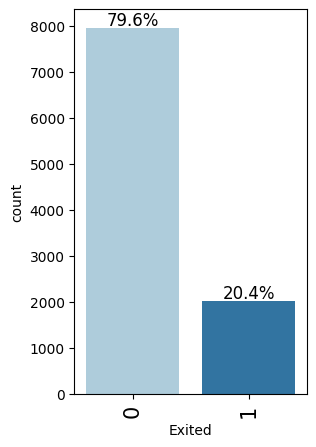

In [487]:
labeled_barplot(ds, "Exited", perc=True)


*   The target variable "Exited" shows class imbalance.
*   20.4% of the customers "Exited"



#### Observations on Geography

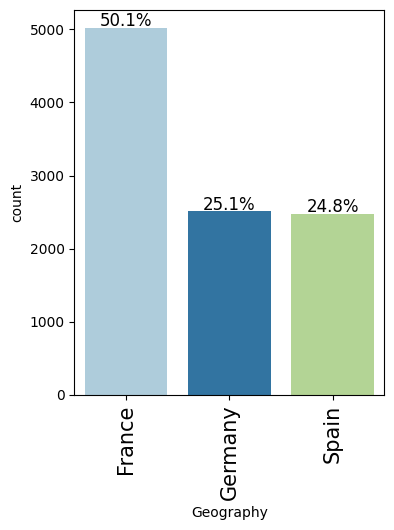

In [488]:
labeled_barplot(ds, "Geography", perc=True)               # create labeled_barplot for Geography



*   ~50% of the Customers in the dataset are from France, followed by 25.1% from Germany, 24.8% from Spain


#### Observations on Gender

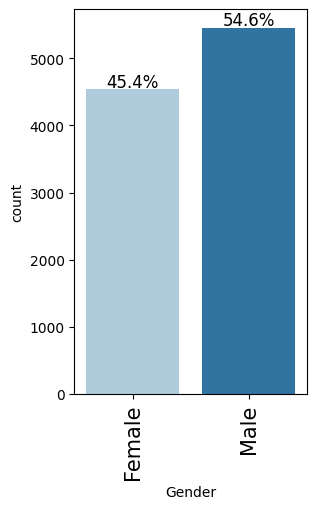

In [489]:
labeled_barplot(ds, "Gender", perc=True)               # create labeled_barplot for Gender


*  The proportion of Males in the dataset is more than Females.


#### Observations on Tenure

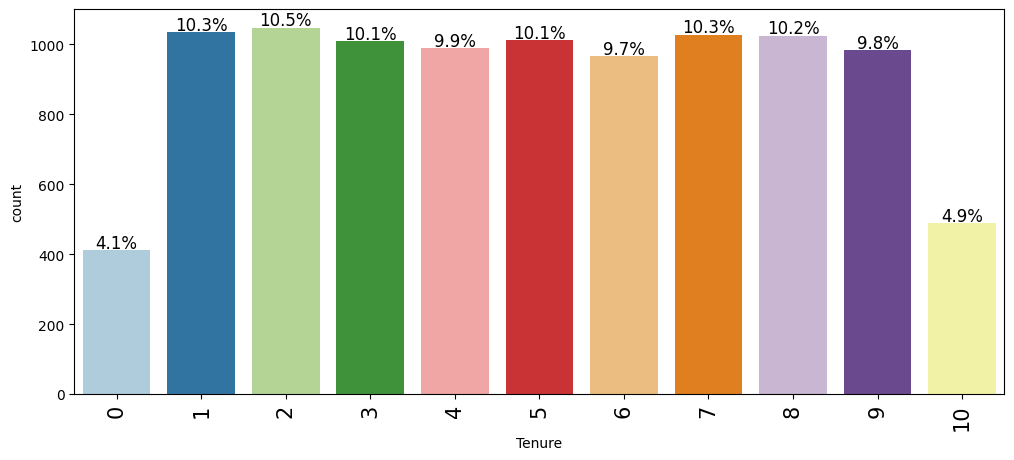

In [490]:
labeled_barplot(ds, "Tenure", perc=True)               # create labeled_barplot for Tenure



*   Tenure 1-9 years is each represented by ~10% of the customers
*   ~5% of customers have tenure 10 years, ~4% have tenure of 0.



#### Observations on Number of Products

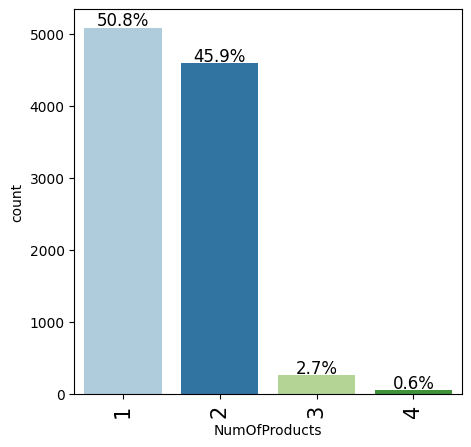

In [491]:
labeled_barplot(ds, 'NumOfProducts', perc=True)               # create labeled_barplot for Number of products



*   ~51% of customers have single product from the bank, ~46% have two products
*   Very few customers have 3 or 4 products.



#### Observations on Has Credit Card

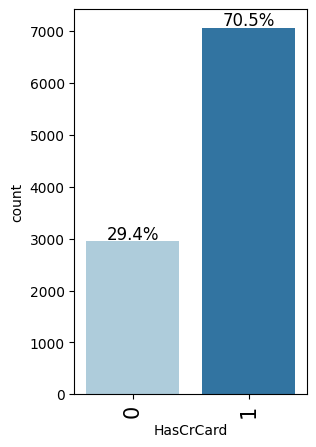

In [492]:
labeled_barplot(ds,'HasCrCard', perc=True)               # create labeled_barplot for Has credit card



*   70.5% of customers have credit card with the bank



#### Observations on Is Active Member

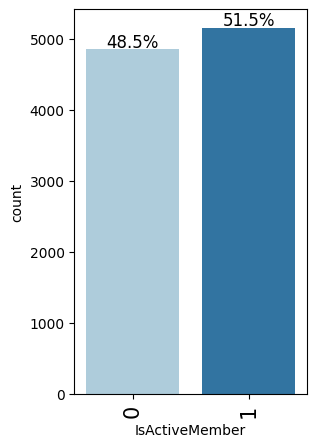

In [493]:
labeled_barplot(ds, 'IsActiveMember', perc=True)               # create labeled_barplot for Is active member



*   51.5% of customers are active while 48.5% are not active



### Bivariate Analysis

In [494]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [495]:
# defining the list of numerical and Boolean columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary", "NumOfProducts", "IsActiveMember", "HasCrCard", "Exited"]

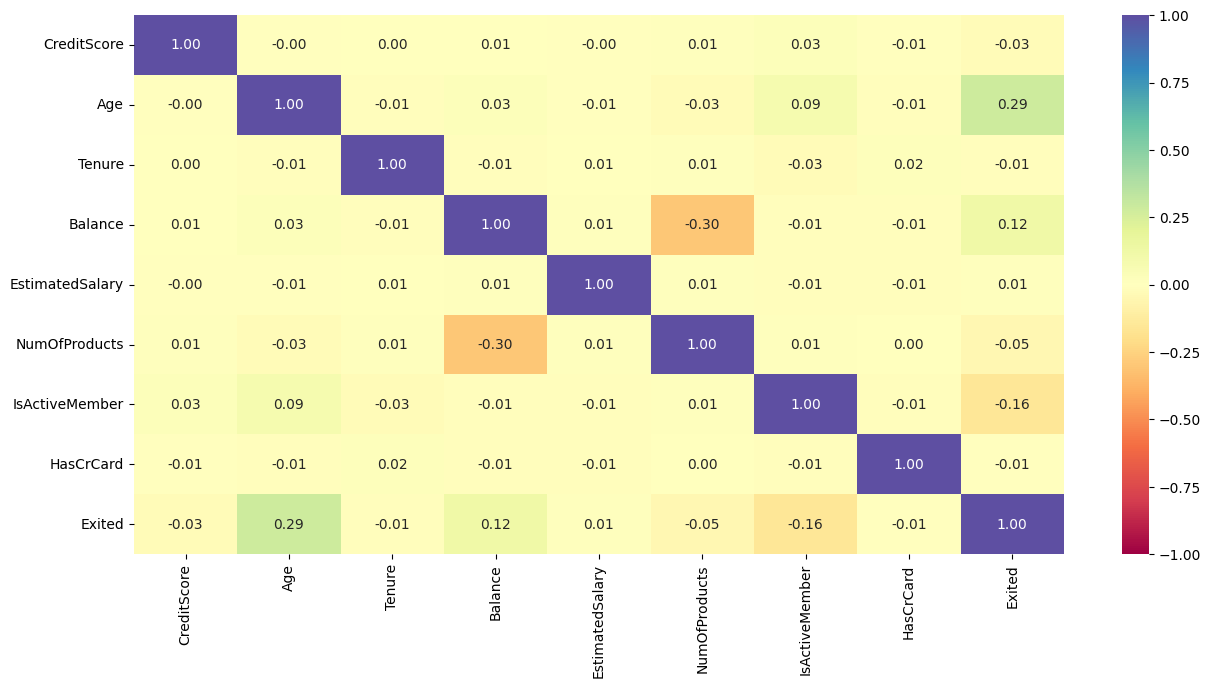

In [496]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is a positive correlation of 0.29 between Age and Exited.
* There is a negative correlation between balance and the number of products a customer has purchased through the bank.
* There is weak negative correlation between IsActiveMember and Exited
* There is a weak positive correlation between Balance and Exited.
* The dataset exhibits overall low correlations between its variables.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


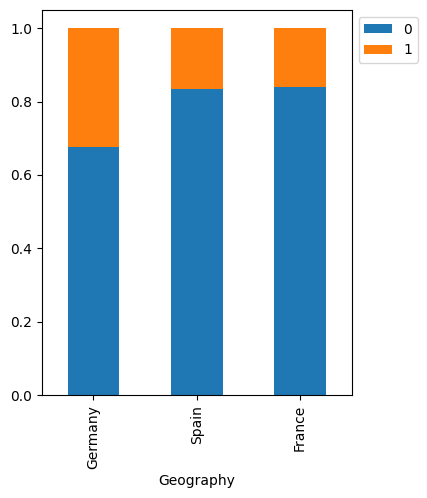

In [497]:
stacked_barplot(ds, "Geography", "Exited" )

*   Germany has the highest number of customers who have churned.



#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


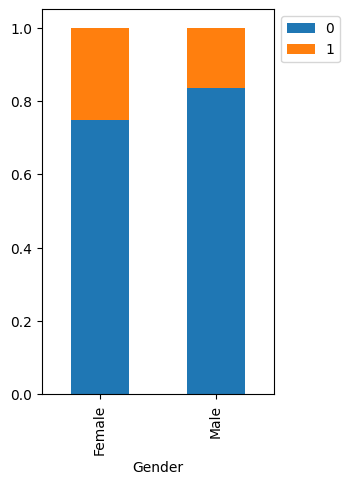

In [498]:
stacked_barplot(ds, "Gender", "Exited" )                   # stacked barplot for Exited and Gender


*   More females have exited as compared to males from the bank.


#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


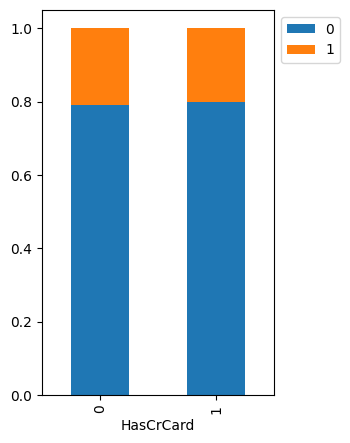

In [499]:
stacked_barplot(ds, "HasCrCard", "Exited" )                   # stacked barplot for Exited and Has credit card


*   Having a credit card has no significant impact on customer churn


#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


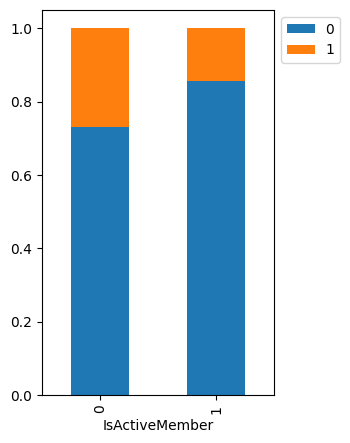

In [500]:
stacked_barplot(ds, "IsActiveMember", "Exited")                   # code to plot stacked barplot for Exited and Is active member



*   Active members have lesser churn rate in comparision to inactive members.


#### Exited Vs Credit Score

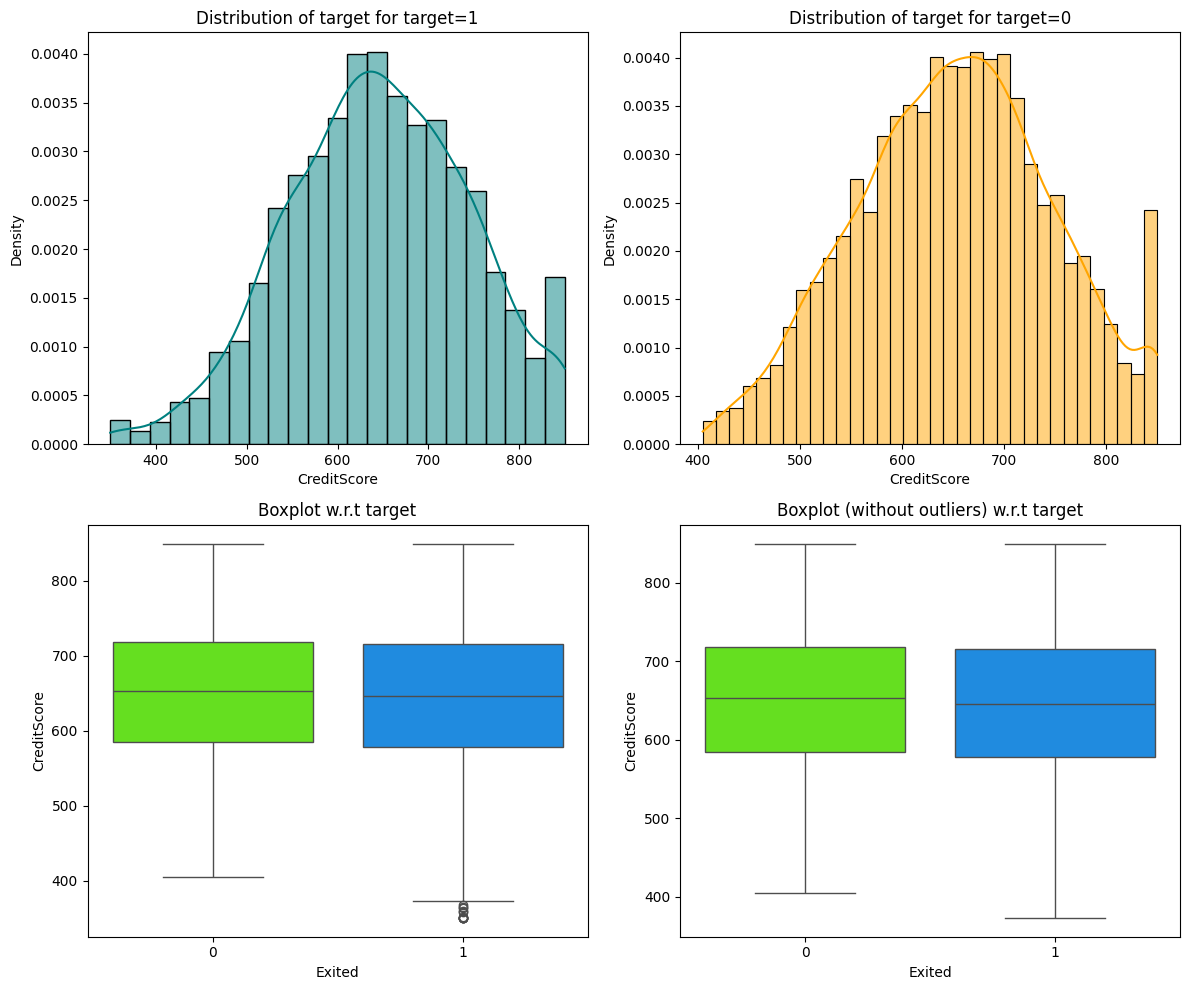

In [501]:
distribution_plot_wrt_target(ds, "CreditScore", "Exited")

*   The credit card distribution between Exited and Not Exited customers does not show any significant difference

#### Exited Vs Age

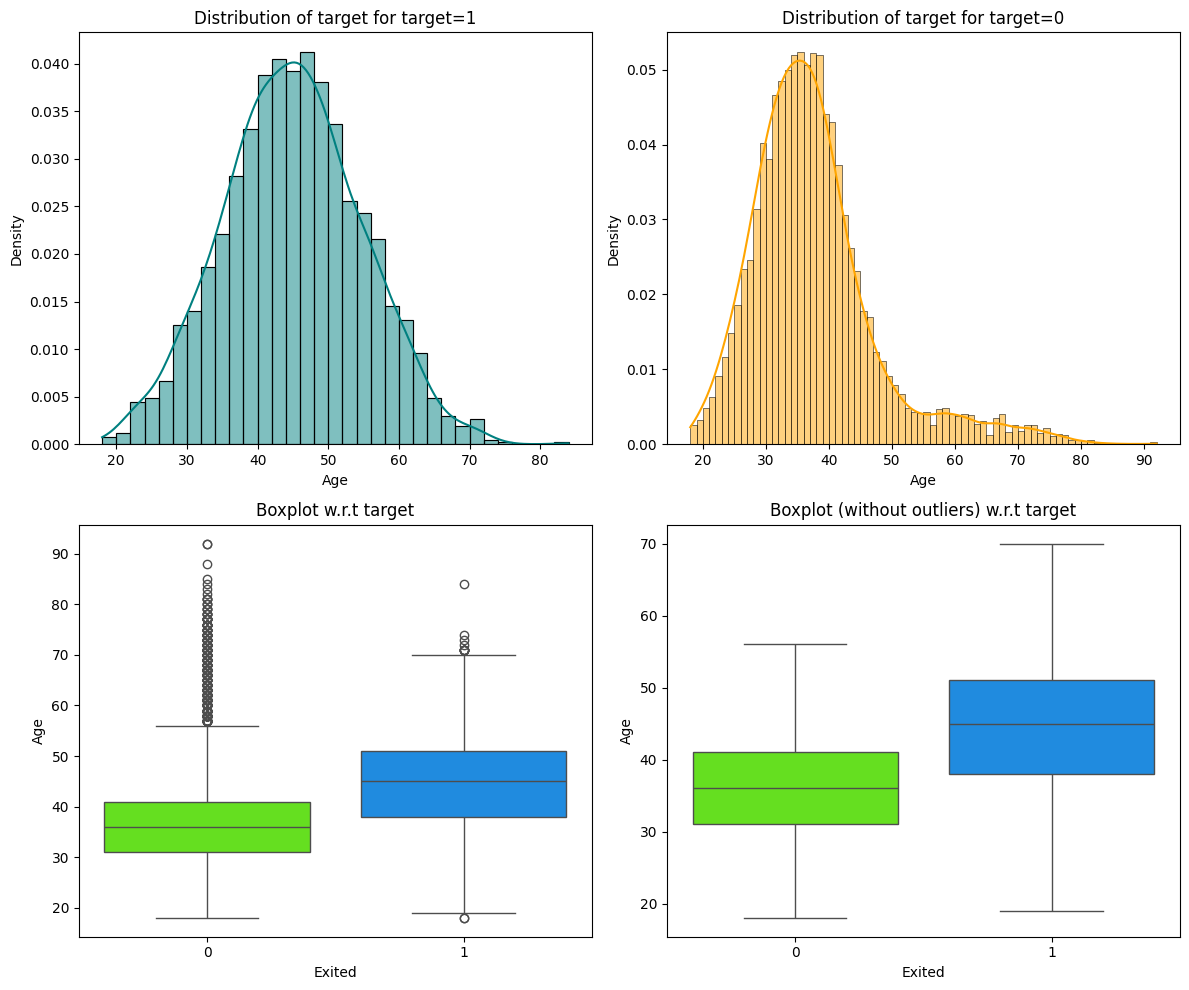

In [502]:
distribution_plot_wrt_target(ds, "Age", "Exited")

*   The Age distribution between Exited and Not Exited customers shows that the older customers churn more in comparison to the younger ones.
* The median age of exited customers is higher than median age of not exited customers.

#### Exited Vs Tenure

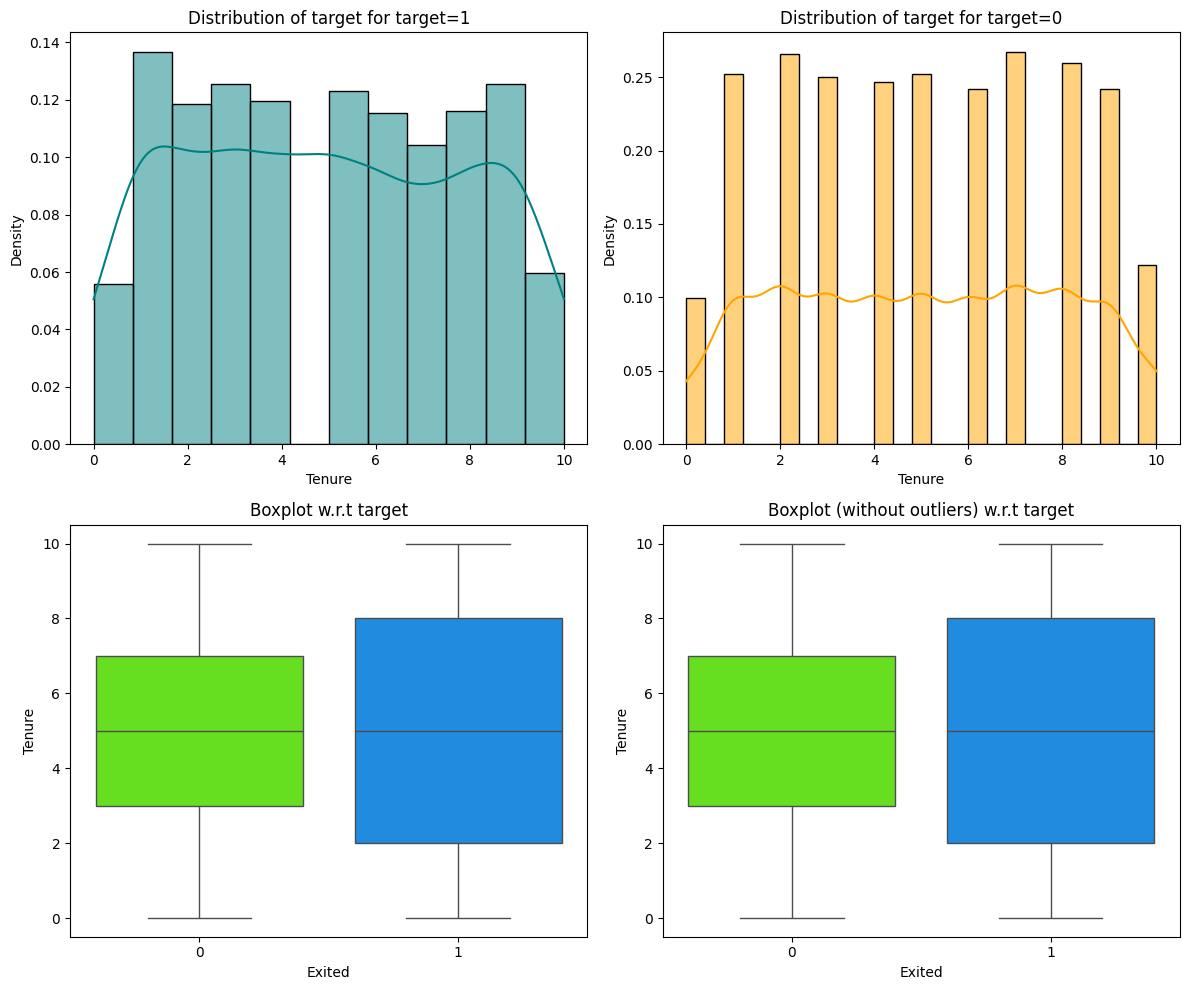

In [503]:
distribution_plot_wrt_target(ds, "Tenure", "Exited")

*   The customers who spent more time with the bank or less time are more likely to churn than the customers who spent time around the average number of years.

#### Exited Vs Balance

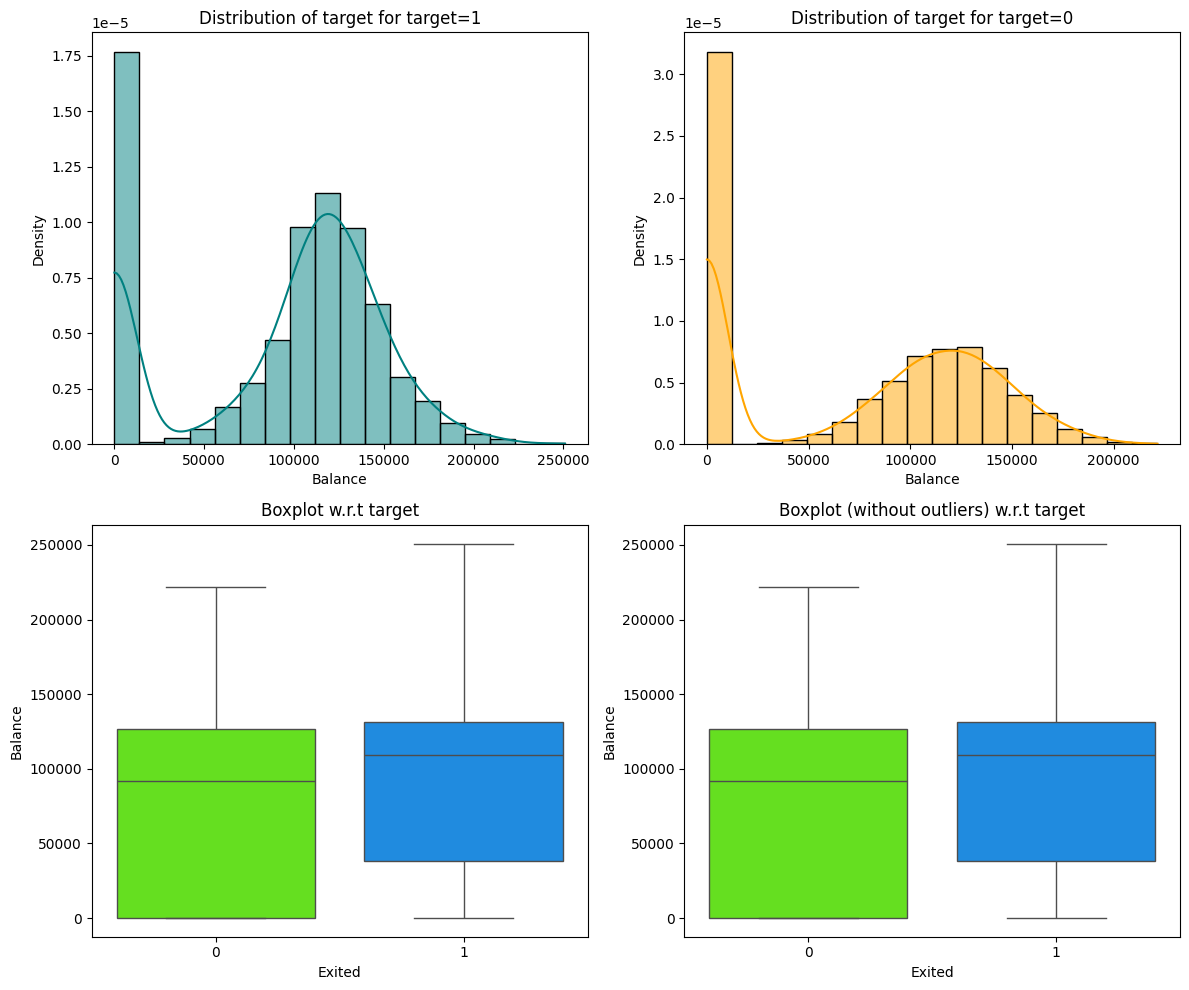

In [504]:
distribution_plot_wrt_target(ds, "Balance", "Exited")


*   The customers with high balance are more likely to churn.



#### Exited Vs Number of Products

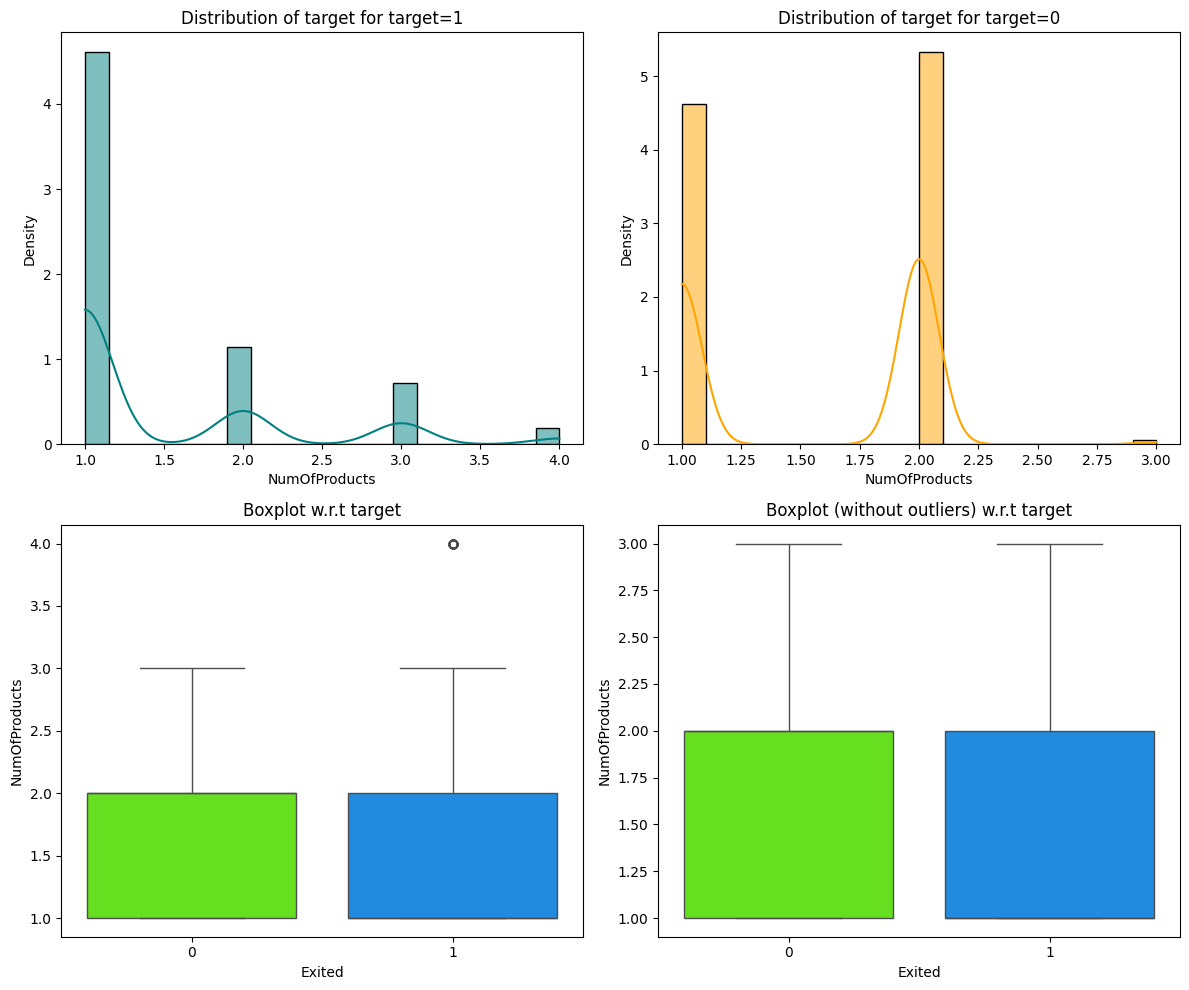

In [505]:
distribution_plot_wrt_target(ds, "NumOfProducts", "Exited")



*   Number of products has no impact on credit card churn.


#### Exited Vs Estimated Salary

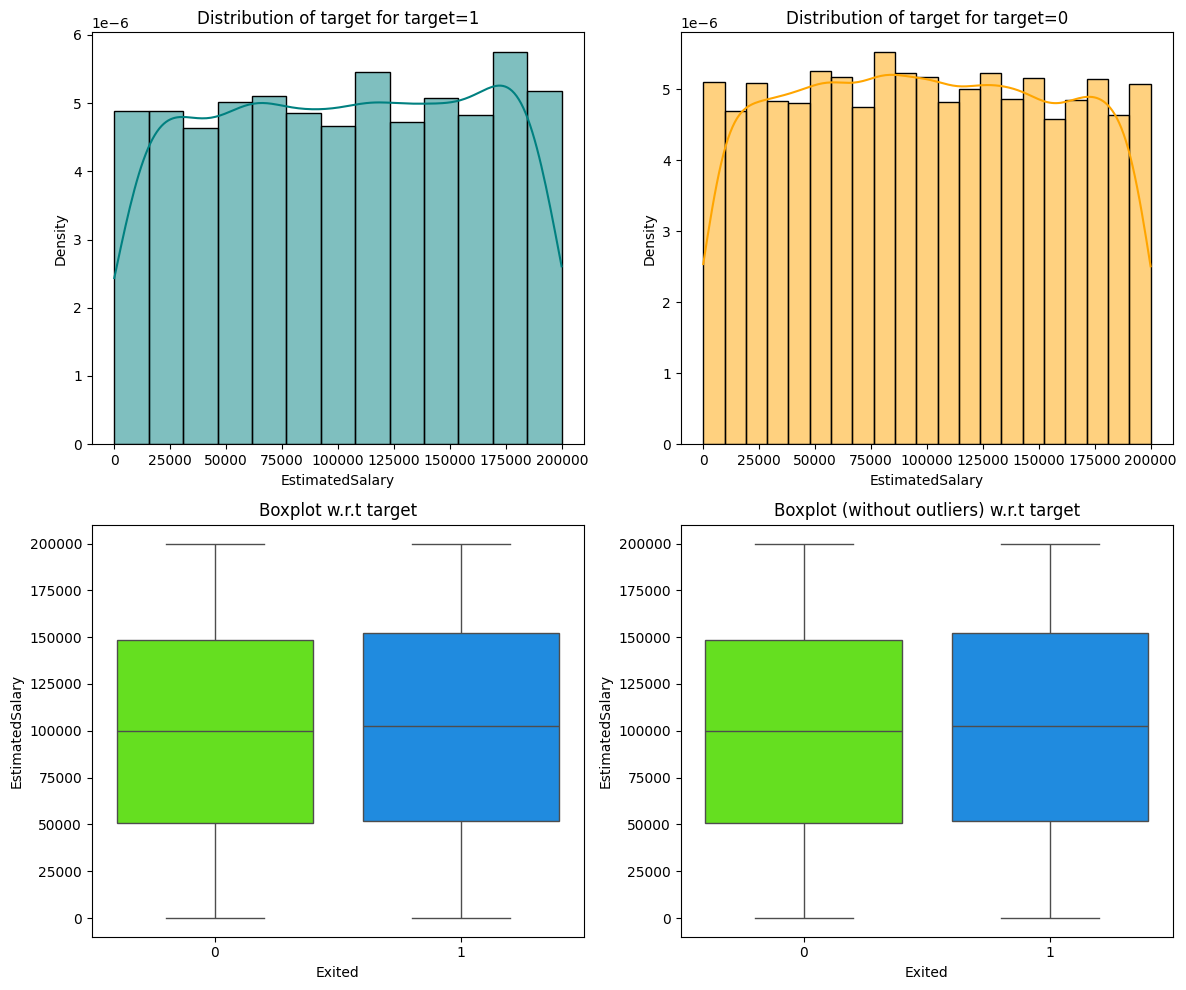

In [506]:
distribution_plot_wrt_target(ds, "EstimatedSalary", "Exited")


*   EstimatedSalary has no impact on credit card churn.


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Missing Value Treatment

There are no missing values in the dataset, hence it doesn't require any treatment.

### Feature Engineering

Converting object columns to categorical

In [648]:
# Converting 'Gender' and 'Geography' columns to categorical
ds[['Gender', 'Geography']] = ds[['Gender', 'Geography']].astype('category')

In [649]:
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Drop columns

In [650]:
# dropping `RowNumber`, `CustomerId`, and `Surname`
ds.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

### Outlier Removal


In [651]:
# Code to be used checking for outliers.
Q1 = ds.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = ds.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Q3 - Q1           # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding the lower bounds for all values. All values outside these bounds are outliers.
upper = Q3 + 1.5 * IQR  # Finding the upper bounds for all values. All values outside these bounds are outliers.
# Checking the percentages of outliers, as defined by the previous cell.
((ds.select_dtypes(include=["float64", "int64"]) < lower)
    |(ds.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(ds) * 100

,0
CreditScore,0.15
Age,3.59
Tenure,0.00
Balance,0.00
NumOfProducts,0.60
HasCrCard,0.00
IsActiveMember,0.00
EstimatedSalary,0.00
Exited,20.37


Outliers are present in Age and CreditScore.

Though these appear to be actual real world data and do not require any treatment.

### Train-validation-test Split

In [652]:
data = ds.copy()
# Splitting the Data
X_data = data.drop(["Exited"], axis=1)

# target variable
y_data = data["Exited"]  # target variable

# Splitting the data up in train, validation and test sets

X_temp, X_test, y_temp, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1, stratify=y_data, shuffle = True)

X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=1, stratify=y_temp, shuffle = True)

In [653]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6400, 10)
Shape of X_val: (1600, 10)
Shape of X_test: (2000, 10)
Shape of y_train: (6400,)
Shape of y_val: (1600,)
Shape of y_test: (2000,)


### Encoding Categorical Variables

In [654]:
# Creating dummy variables for the 2 the categorical variables
cat_cols=ds.select_dtypes(include=["category"]).columns.tolist()
# Encoding X_train data frame categorical columns.
X_train = pd.get_dummies(X_train, columns=cat_cols, drop_first=True)
X_train = X_train.astype(float)
# Encoding X_val data frame categorical columns.
X_val = pd.get_dummies(X_val, columns=cat_cols, drop_first=True)
X_val = X_val.astype(float)
# Encoding X_test data frame categorical columns.
X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)
X_test = X_test.astype(float)
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (6400, 11)
Shape of X_val: (1600, 11)
Shape of X_test: (2000, 11)


In [655]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5292,745.0,28.0,6.0,0.00,2.0,1.0,0.0,154389.18,0.0,0.0,0.0
3879,778.0,33.0,9.0,151772.63,2.0,0.0,0.0,180249.94,0.0,0.0,0.0
6118,632.0,49.0,5.0,167962.70,1.0,0.0,0.0,140201.21,0.0,0.0,0.0
4044,658.0,32.0,8.0,0.00,1.0,1.0,1.0,80410.68,0.0,0.0,1.0
3202,564.0,33.0,4.0,135946.26,1.0,1.0,0.0,63170.00,0.0,0.0,0.0


In [656]:
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4466,413.0,35.0,2.0,0.00,2.0,1.0,1.0,60972.84,0.0,1.0,1.0
3754,535.0,35.0,8.0,118989.92,1.0,1.0,1.0,135536.72,0.0,1.0,1.0
9601,659.0,33.0,7.0,89939.62,1.0,1.0,0.0,136540.09,0.0,0.0,0.0
9758,556.0,43.0,4.0,125890.72,1.0,1.0,1.0,74854.97,1.0,0.0,0.0
8577,754.0,65.0,1.0,136186.44,1.0,1.0,1.0,121529.59,1.0,0.0,1.0


In [657]:
X_val.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6919,782.0,33.0,7.0,191523.09,1.0,1.0,1.0,167058.75,0.0,0.0,1.0
7849,643.0,41.0,7.0,154902.66,1.0,1.0,1.0,49667.28,1.0,0.0,1.0
5810,495.0,42.0,7.0,0.00,2.0,0.0,0.0,130404.53,0.0,1.0,0.0
594,779.0,26.0,4.0,174318.13,2.0,0.0,1.0,38296.21,0.0,1.0,0.0
2485,753.0,38.0,6.0,142263.45,1.0,0.0,1.0,33730.43,0.0,0.0,0.0


### Data Normalization

Using StandardScaler to scale columns

In [658]:
# Specifying columns to scale
columns_to_scale = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

# Create a scaler
scaler = StandardScaler()

# Fiting on the training set
scaler.fit(X_train[columns_to_scale])

# Transforming the training set
X_train[columns_to_scale] = scaler.transform(X_train[columns_to_scale])

# Transforming the validation and test sets
X_val[columns_to_scale] = scaler.transform(X_val[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [659]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5292,0.976155,-1.047381,0.347046,-1.212523,2.0,1.0,0.0,0.939366,0.0,0.0,0.0
3879,1.316949,-0.572048,1.377238,1.214872,2.0,0.0,0.0,1.389376,0.0,0.0,0.0
6118,-0.190810,0.949016,0.003649,1.473810,1.0,0.0,0.0,0.692477,0.0,0.0,0.0
4044,0.077695,-0.667115,1.033841,-1.212523,1.0,1.0,1.0,-0.347954,0.0,0.0,1.0
3202,-0.893054,-0.572048,-0.339749,0.961751,1.0,1.0,0.0,-0.647963,0.0,0.0,0.0


## Model Building

### Model Evaluation Criterion

**Write down the logic for choosing the metric that would be the best metric for this business scenario.**


The performance of the model will depend both on the correct predictions made by the model and error.

There can be wrong predictions as:

*  **False Positives:** Predicting the customer will exit and they don't, we will be targeting customers and spending time and resources on them and they don't exit - **Loss of resources**
*  **False Negatives:** Predicting a customer will not exit
and the customer does i.e. losing on a credit card customer for the bank because that customer will not be targeted by the business team when he should be targeted - **Loss of opportunity**

**Which metric to optimize?**

We want to minimize false negatives because if a model predicts that a customer will not exit and he does then it leads to loss of opportunity.
We will try to **maximize recall** to have lesser false negatives.

**Function for plotting the confusion matrix**



In [660]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [661]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [662]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [663]:
# initializing the model
model_0 = Sequential()

#input layer
model_0.add(Dense(units=64, activation='relu', input_dim = X_train.shape[1]))

#hidden layer
model_0.add(Dense(units=32, activation='relu'))

#output layer
model_0.add(Dense(1, activation='sigmoid'))

In [664]:
# Creating the model with SGD optimizer with default learning rate and recall as the metric
model_0.compile(optimizer= tf.keras.optimizers.SGD(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

In [665]:
model_0.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [666]:
history = model_0.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    batch_size=32,
    verbose=1
)


Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5574 - recall: 0.0357 - val_loss: 0.4781 - val_recall: 0.0000e+00
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4769 - recall: 0.0000e+00 - val_loss: 0.4566 - val_recall: 0.0031
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4574 - recall: 0.0070 - val_loss: 0.4437 - val_recall: 0.0276
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4456 - recall: 0.0551 - val_loss: 0.4355 - val_recall: 0.0706
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4382 - recall: 0.0942 - val_loss: 0.4300 - val_recall: 0.0951
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4332 - recall: 0.1240 - val_loss: 0.4260 - val_recall: 0.1350
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4294 - recall: 0.1558 - val_loss: 0.4228 - val_recall: 0.1687
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4264 - recall: 0.1807 - val_loss: 0.4202 - val_recall: 0.1748


**Loss Function**

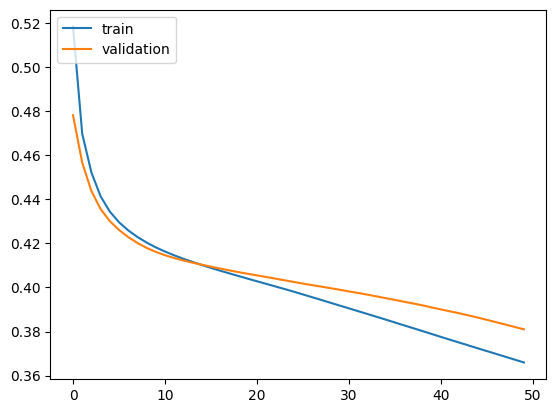

In [667]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.legend(("train", "validation"), loc='upper left')

**Train recall vs Validation recall**

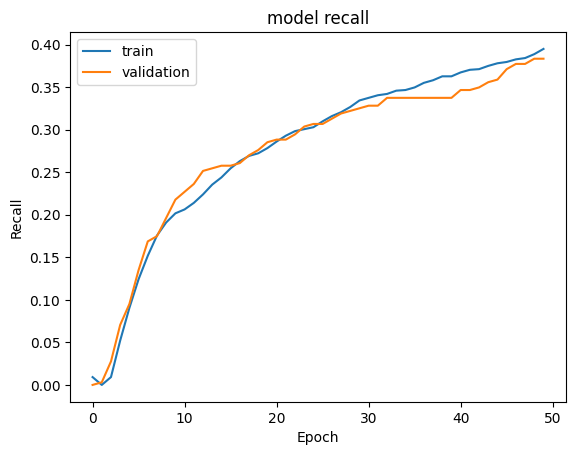

In [668]:
#Plotting Train recall vs Validation recall
plt.plot(hist['recall'])
plt.plot(hist['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [669]:
 # Predicting the results using 0.5 as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [670]:
 # Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [671]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [672]:
# classification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      5096
           1       0.73      0.39      0.51      1304

    accuracy                           0.85      6400
   macro avg       0.79      0.68      0.71      6400
weighted avg       0.83      0.85      0.83      6400



In [673]:
#classification report
cr=classification_report(y_val, y_val_pred)    # check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1274
           1       0.66      0.38      0.48       326

    accuracy                           0.83      1600
   macro avg       0.76      0.67      0.69      1600
weighted avg       0.82      0.83      0.82      1600



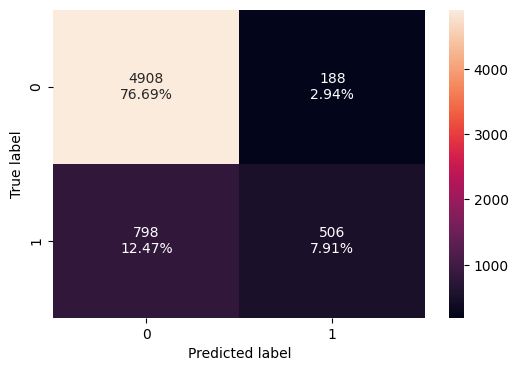

In [674]:
make_confusion_matrix(y_train, y_train_pred)

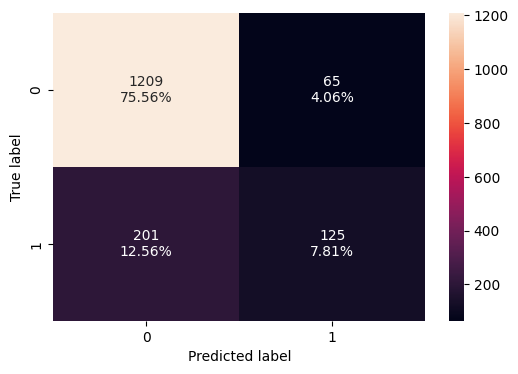

In [675]:
make_confusion_matrix(y_val, y_val_pred)



*   The model has very low recall of 0.39 for training and 0.38 for validation data set, hence performs poorly.
*   The model predicts has high false negative rate of ~13%


## Model Performance Improvement

### Neural Network with Adam Optimizer

In [532]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [533]:
model1 = Sequential()

# Adding the input layer
model1.add(Dense(units=64, activation='relu', input_dim=11))

#Adding the hidden layer
model1.add(Dense(units=32, activation="relu"))

# Adding the output layer
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])

In [534]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [535]:
history1 = model1.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_val, y_val),
    batch_size=64,
    verbose=1
  )


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5187 - recall: 0.0362 - val_loss: 0.4267 - val_recall: 0.1902
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4307 - recall: 0.1908 - val_loss: 0.4126 - val_recall: 0.2669
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4171 - recall: 0.2640 - val_loss: 0.4049 - val_recall: 0.3129
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4056 - recall: 0.3156 - val_loss: 0.3990 - val_recall: 0.3405
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3953 - recall: 0.3416 - val_loss: 0.3934 - val_recall: 0.3313
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3859 - recall: 0.3643 - val_loss: 0.3884 - val_recall: 0.3497
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3772 - recall: 0.3793 - val_loss: 0.3837 - val_recall: 0.3589
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3697 - recall: 0.3895 - val_loss: 0.3800 - val_recall: 0.3712
Epoch 9/

**Loss function**

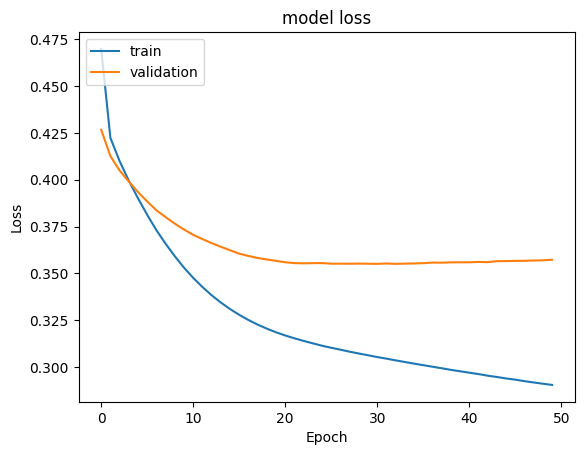

In [536]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

* The model loss continues to drop and shows improvement in training data but the validation data doesn't show any improvement with the increase in number of epochs.
* This could mean that the model is overfitting training data.

**Train recall vs Validation recall**

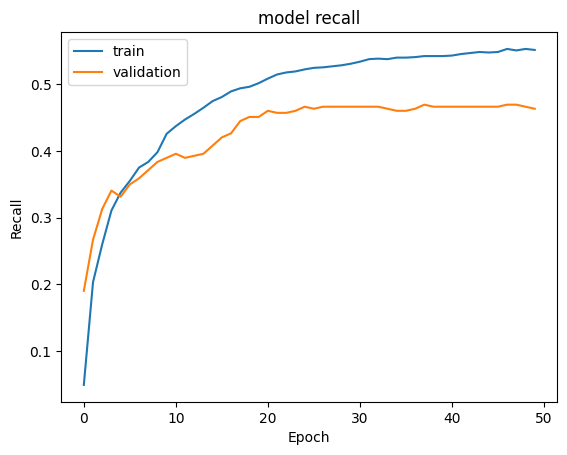

In [537]:
# Plotting Train recall vs Validation recall
plt.plot(history1.history['recall'])
plt.plot(history1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [538]:
# Predicting the results using 0.5 as the threshold
y_train_pred = model1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [539]:
# Predicting the results using 0.5 as the threshold
y_val_pred = model1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [540]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [541]:
#lassification report
cr=classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      5096
           1       0.81      0.57      0.67      1304

    accuracy                           0.88      6400
   macro avg       0.85      0.77      0.80      6400
weighted avg       0.88      0.88      0.88      6400



In [542]:
#classification report
cr=classification_report(y_val, y_val_pred)  # code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1274
           1       0.68      0.46      0.55       326

    accuracy                           0.85      1600
   macro avg       0.78      0.70      0.73      1600
weighted avg       0.83      0.85      0.83      1600



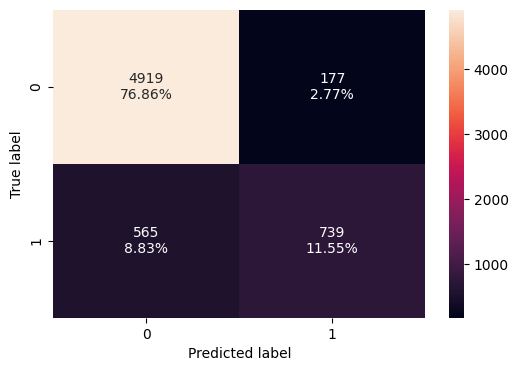

In [543]:
# Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

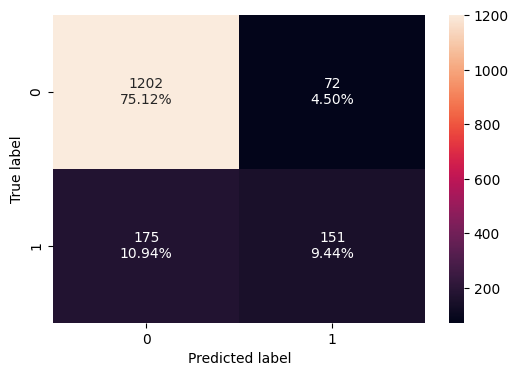

In [544]:
# Calculating the confusion matrix
make_confusion_matrix(y_val, y_val_pred)  # code to check the model's performance on the validation set



*   NN with Adam is better than the first model but still has very low recall for both training and validation dataset.
*   Recall score for training data has improved but for validation data still remains low.
* The model predicts has high false negative rate of ~11%.



### Neural Network with Adam Optimizer and Dropout

In [545]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [546]:
#Initializing the neural network
model2 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model2.add(Dense(32,activation='relu',input_dim = 11))

# Adding dropout with ratio of 0.2
model2.add(Dropout(0.2))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model2.add(Dense(16,activation='relu'))

# Adding dropout with ratio of 0.2
model2.add(Dropout(0.2))
# Adding the second hidden layer with 8 neurons with relu as activation functions
model2.add(Dense(8,activation='relu'))

model2.add(Dropout(0.2))

model2.add(Dense(4,activation='relu'))

# Adding the output layer
model2.add(Dense(1, activation = 'sigmoid'))

model2.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.Recall()])
model2.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

In [547]:
history2 = model2.fit(
    X_train,y_train,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data=(X_val,y_val),
)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5511 - recall: 0.0244 - val_loss: 0.4417 - val_recall: 0.0000e+00
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.4703 - recall: 0.0000e+00 - val_loss: 0.4306 - val_recall: 0.0000e+00
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4621 - recall: 0.0000e+00 - val_loss: 0.4274 - val_recall: 0.0000e+00
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4568 - recall: 0.0022 - val_loss: 0.4277 - val_recall: 0.0000e+00
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4471 - recall: 0.0000e+00 - val_loss: 0.4268 - val_recall: 0.0000e+00
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4440 - recall: 0.0000e+00 - val_loss: 0.4267 - val_recall: 0.0000e+00
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4448 - recall: 0.0000e+00 - val_loss: 0.4248 - val_recall: 0.0000e+00
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4503 - recall: 7.4850e

**Loss Function**

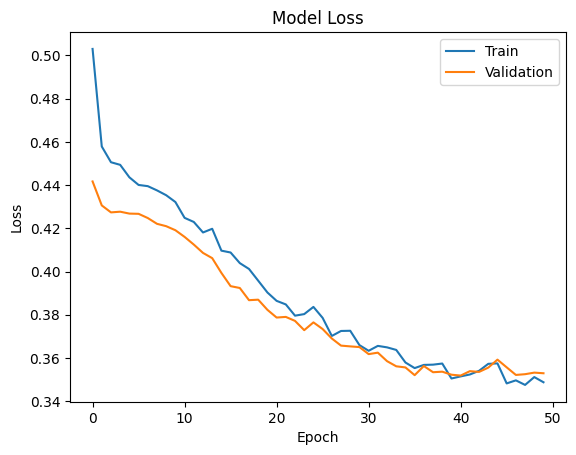

In [548]:
# Plot training loss and validation loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**Train recall vs Validation recall**

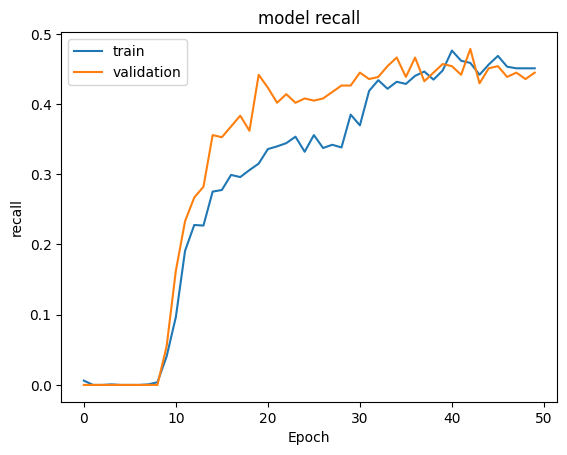

In [549]:
# Plotting Train recall vs Validation recall
plt.plot(history2.history['recall'])
plt.plot(history2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [550]:
#Predicting the results using best as a threshold
y_train_pred = model2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [551]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [552]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

In [553]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      5096
           1       0.79      0.51      0.62      1304

    accuracy                           0.87      6400
   macro avg       0.84      0.74      0.77      6400
weighted avg       0.87      0.87      0.86      6400



In [554]:
#classification report
cr = classification_report(y_val,y_val_pred) ## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1274
           1       0.71      0.44      0.55       326

    accuracy                           0.85      1600
   macro avg       0.79      0.70      0.73      1600
weighted avg       0.84      0.85      0.84      1600



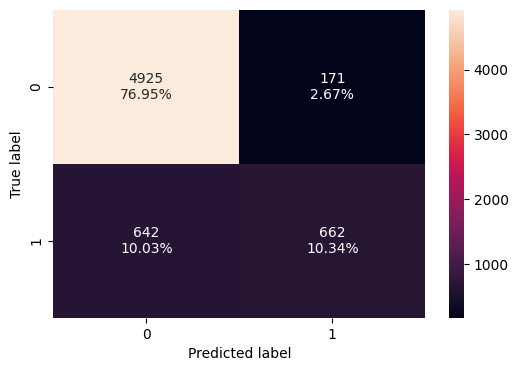

In [555]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

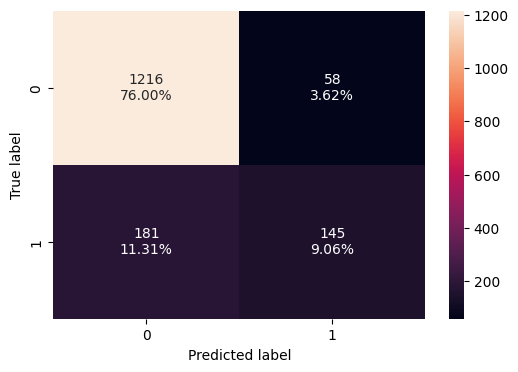

In [556]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## check the model's performance on the validation set



*   NN with Adam and Dropout performs poorly than NN with Adam.
*   There is no improvement in loss / recall with increase in number of epochs
*   The False Negative rate is high at ~11%.



### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [557]:
sm  = SMOTE(random_state=42)
# fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train, y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



Let's build a model with the balanced dataset

In [558]:
backend.clear_session()
# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [559]:
#Initializing the model
model_3 = Sequential()
# add a input layer
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
# add a hidden layer
model_3.add(Dense(16,activation='relu'))
# add a hidden layer
model_3.add(Dense(8,activation='relu'))
#  add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [560]:
# use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD()
metric = keras.metrics.Recall()


In [561]:
#  compile the model with SGD as the optimizer, binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [562]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [563]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6958 - recall: 0.8844 - val_loss: 0.6685 - val_recall: 0.6871
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6622 - recall: 0.6814 - val_loss: 0.6280 - val_recall: 0.6963
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6263 - recall: 0.7007 - val_loss: 0.6027 - val_recall: 0.7209
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5933 - recall: 0.7179 - val_loss: 0.5898 - val_recall: 0.7393
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5752 - recall: 0.7340 - val_loss: 0.5826 - val_recall: 0.7209
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5673 - recall: 0.7409 - val_loss: 0.5791 - val_recall: 0.7301
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5628 - recall: 0.7455 - val_loss: 0.5784 - val_recall: 0.7362
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5595 - recall: 0.7478 - val_loss: 0.5766 - val_recall: 0.7393
Epoch 9/

**Loss function**

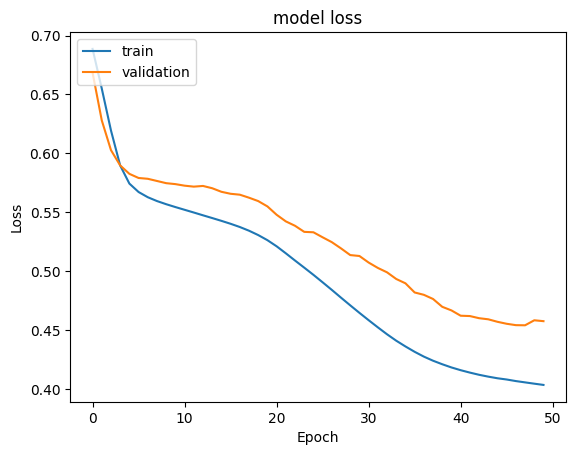

In [564]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Train recall vs Validation recall**

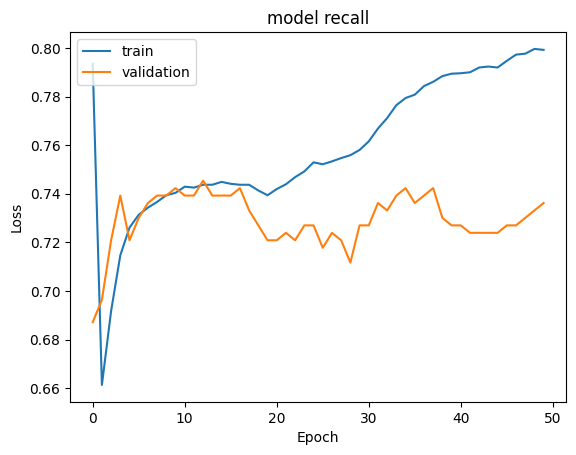

In [565]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [566]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [567]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [568]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [569]:
cr=classification_report(y_train_smote, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      5096
           1       0.82      0.82      0.82      5096

    accuracy                           0.82     10192
   macro avg       0.82      0.82      0.82     10192
weighted avg       0.82      0.82      0.82     10192



In [570]:
cr=classification_report(y_val, y_val_pred) ## check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1274
           1       0.49      0.74      0.59       326

    accuracy                           0.79      1600
   macro avg       0.71      0.77      0.72      1600
weighted avg       0.83      0.79      0.80      1600



**Confusion matrix**

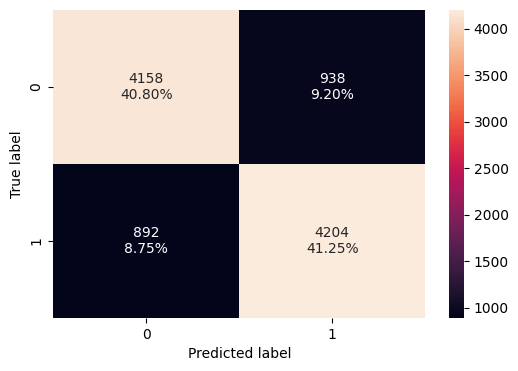

In [571]:
# Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)



*   This model performs better than the previous models and has a high recall for training data at 0.82 and validation data at 0.74.
*   The false negative rate is still high at 8.75% but lower than previous models.



### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

Let's build a model with the balanced dataset

In [572]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [573]:
#Initializing the model
model_4 = Sequential()
# add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
# add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(16,activation='relu'))
# add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(8,activation='relu'))
#  add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [574]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [575]:
# use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
metric = keras.metrics.Recall()


In [576]:
#  compile the model with Adam optimizer, binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [577]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [578]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.6414 - recall: 0.7567 - val_loss: 0.5734 - val_recall: 0.7117
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5561 - recall: 0.7414 - val_loss: 0.5585 - val_recall: 0.7086
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5384 - recall: 0.7528 - val_loss: 0.5363 - val_recall: 0.7178
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5129 - recall: 0.7649 - val_loss: 0.5167 - val_recall: 0.7209
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4887 - recall: 0.7828 - val_loss: 0.5025 - val_recall: 0.7178
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4719 - recall: 0.7852 - val_loss: 0.4964 - val_recall: 0.7270
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4599 - recall: 0.7916 - val_loss: 0.4862 - val_recall: 0.7270
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4497 - recall: 0.7959 - val_loss: 0.4793 - val_recall: 0.7209
Epoch 9/

**Loss function**

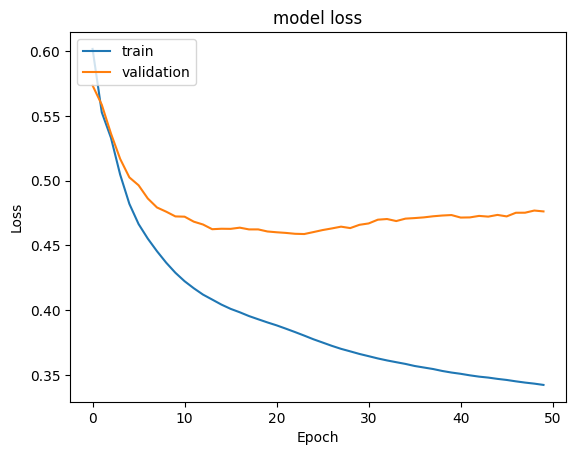

In [579]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



*   Training loss continues to drop with number of epochs whereas the validation loss increases.
*   The model is likely overfitting.



**Train recall vs Validation recall**

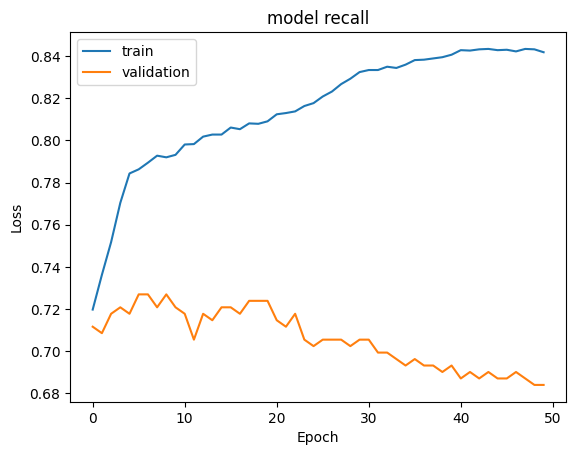

In [580]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [581]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [ True]])

In [582]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [583]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

In [584]:
cr=classification_report(y_train_smote, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      5096
           1       0.85      0.87      0.86      5096

    accuracy                           0.86     10192
   macro avg       0.86      0.86      0.86     10192
weighted avg       0.86      0.86      0.86     10192



In [585]:
cr=classification_report(y_val, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.80      0.85      1274
           1       0.47      0.68      0.56       326

    accuracy                           0.78      1600
   macro avg       0.69      0.74      0.71      1600
weighted avg       0.82      0.78      0.79      1600



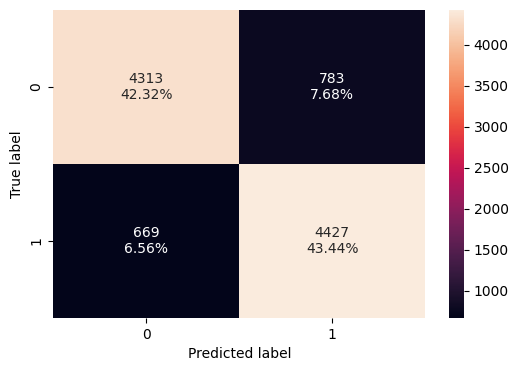

In [586]:
make_confusion_matrix(y_train_smote, y_train_pred)

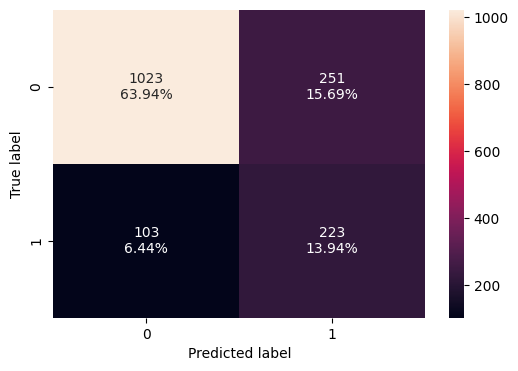

In [587]:
make_confusion_matrix(y_val, y_val_pred)



*   NN with Balanced Data and Adam Optimizer performs better for training data than the previous model and has a high recall of 0.87 for training data and 0.68 for validation data
*   As the difference between the training and the validation recall is still high, this model might be overfitting training data.
* The false negative rate is 6.44% and has dropped in comparison to previous models.



### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [588]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [589]:
#Initializing the model
model_5 = Sequential()
#  add 32 neurons to the input layer with relu as activation function
model_5.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
# add dropout rate
model_5.add(Dropout(0.2))
#  add 16 neurons to the hidden layer with any activation function.
model_5.add(Dense(16,activation='relu'))
#  add dropout rate.
model_5.add(Dropout(0.2))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
#  add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [590]:
#use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()
metric = keras.metrics.Recall()

In [591]:
# compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [592]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [593]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32,
    epochs=50,
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6534 - recall: 0.6089 - val_loss: 0.5575 - val_recall: 0.6871
Epoch 2/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5796 - recall: 0.7122 - val_loss: 0.5640 - val_recall: 0.7117
Epoch 3/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5687 - recall: 0.7223 - val_loss: 0.5438 - val_recall: 0.7025
Epoch 4/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5540 - recall: 0.7264 - val_loss: 0.5520 - val_recall: 0.7239
Epoch 5/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5394 - recall: 0.7362 - val_loss: 0.5402 - val_recall: 0.7301
Epoch 6/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5327 - recall: 0.7402 - val_loss: 0.5206 - val_recall: 0.7117
Epoch 7/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5197 - recall: 0.7446 - val_loss: 0.5241 - val_recall: 0.7147
Epoch 8/50
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5130 - recall: 0.7339 - val_loss: 0.5157 - val_recall: 0.7147
Epoch 9/

**Loss function**

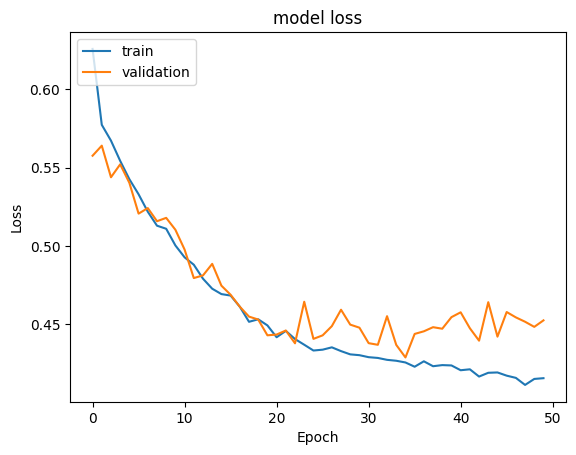

In [594]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Train recall vs Validation recall**

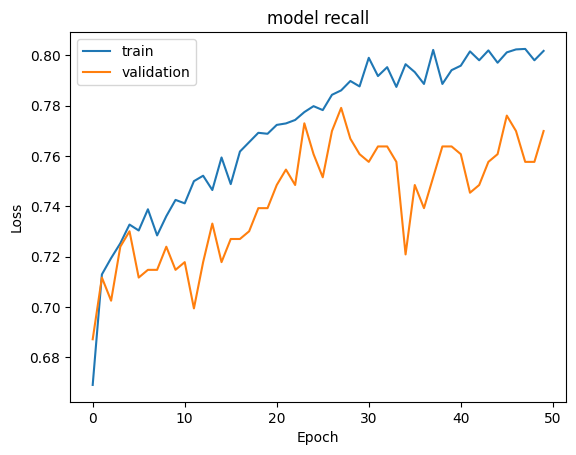

In [595]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [596]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [597]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [598]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [599]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5096
           1       0.82      0.84      0.83      5096

    accuracy                           0.83     10192
   macro avg       0.83      0.83      0.83     10192
weighted avg       0.83      0.83      0.83     10192



In [600]:
# classification report
cr=classification_report(y_val,y_val_pred)  # check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1274
           1       0.50      0.77      0.60       326

    accuracy                           0.79      1600
   macro avg       0.71      0.78      0.73      1600
weighted avg       0.84      0.79      0.81      1600



**Confusion matrix**

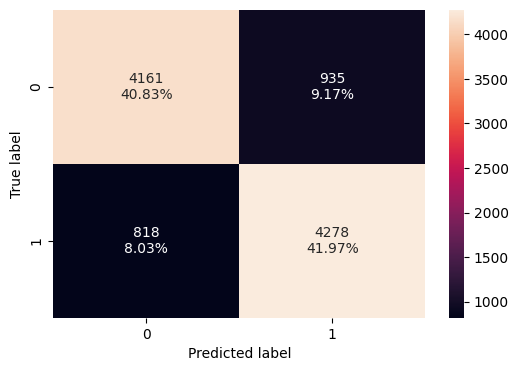

In [601]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

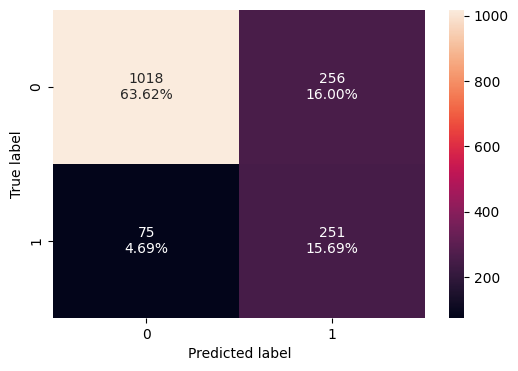

In [602]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)  ## check the model's performance on the validation set



*   The recall for training data is 0.84 and validation data is 0.77
*   For this model, False Negative Rate is lowest among all the models at <5%.
* The difference between the recall for training and validation data has improved, accuracy of the model is also ~80%.



## Model Performance Comparison and Final Model Selection

In [603]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.388037
NN with Adam,0.566718
NN with Adam & Dropout,0.507669
NN with SMOTE & SGD,0.824961
NN with SMOTE & Adam,0.868721
"NN with SMOTE,Adam & Dropout",0.839482


In [604]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.383436
NN with Adam,0.463190
NN with Adam & Dropout,0.444785
NN with SMOTE & SGD,0.736196
NN with SMOTE & Adam,0.684049
"NN with SMOTE,Adam & Dropout",0.769939


In [605]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.004601
NN with Adam,0.103528
NN with Adam & Dropout,0.062883
NN with SMOTE & SGD,0.088764
NN with SMOTE & Adam,0.184671
"NN with SMOTE,Adam & Dropout",0.069543


***Observations:***

The model "Neural Network with Balanced data, Adam and Dropout" shows the best combination of high recall rate and low difference between training and validation recall scores.
It seems to be generalizing the dataset well.
As for our current problem, it is important to identify customers who are likely to exit, high recall is needed and it should generalize well.
So we select the last model "NN with SMOTE, Adam & Dropout" as the best model.





In [610]:
best_model = model_5 ## code to specify the best model
y_test_pred = best_model.predict(X_test)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [611]:
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

[[False]
 [False]
 [ True]
 ...
 [ True]
 [False]
 [False]]


In [612]:
# classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1593
           1       0.48      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



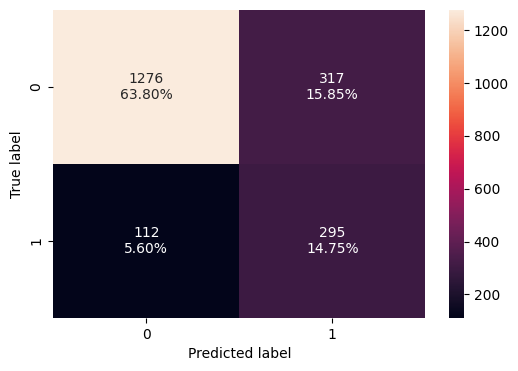

In [613]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)



*   The model has a recall of 0.72 for test data, this means that the model identifies 72% of the customers correctly who churned.
*   The false negative rate is 5.60% which means that the model classified 5.60% of the customers as "not exited" and they actually exited.
* The accuracy of the model is 0.79 which means the model was able to correctly classify 79% of the customes.


## Actionable Insights and Business Recommendations



*  **Service / Incentives for Older Age customers:**
Seniors show higher churn rate in comparision to younger customers, the bank should offer customized services or incentives to older customers.
*   **Campaigns Trageting Inactive customers:** The churn rate for inactive customers is high, the bank should have some incentives / campaigns to engage these inactive customers like emails or phone calls with exclusive offers, rewards, etc.
*  **Tenure Based Campaigns:** For customers with tenure 1 or less, we see higher churn rate, so promotions or campaigns to get them more involved with the bank can help build their relationship and decreases the likelihood that they will exit.
*  **Investigate High Churn Rate in Germany**: The churn rate is high in Germany, the bank should investigate and resolve the reason for such a high churn rate for German customers.
*  **Cross sell & Upsell products:** Majority of the customes hold only one product with the bank, the retention rate can improve by selling different products to customers and will likely improve their engagement with the bank.





<font size=6 color='blue'>Power Ahead</font>
___